impoorting the required libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

loading dataset

In [8]:
dataset=pd.read_csv("/content/50_Startups.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
# print(x)


encoding categorical variable

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
# print(x)

splitting datast into train and testset

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# print(y_test)

training a multiple linear regression

In [11]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

testset result

In [12]:
y_pred=regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


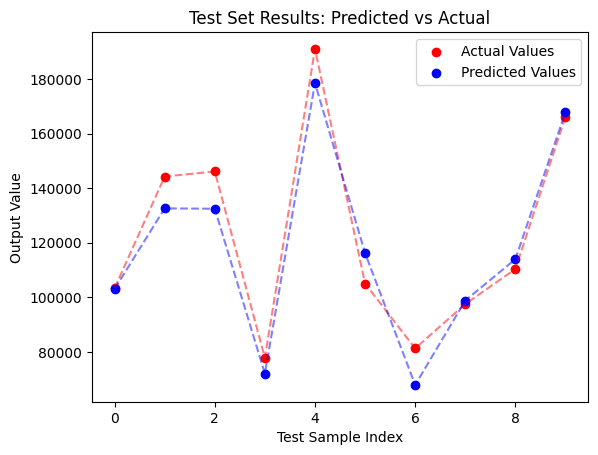

In [14]:

# Plot the actual test results vs. the predicted results
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Values')

# Optionally, you could also add a line plot to visually connect the points.
plt.plot(range(len(y_test)), y_test, color='red', linestyle='--', alpha=0.5)
plt.plot(range(len(y_pred)), y_pred, color='blue', linestyle='--', alpha=0.5)

plt.title('Test Set Results: Predicted vs Actual')
plt.xlabel('Test Sample Index')
plt.ylabel('Output Value')
plt.legend()
plt.show()
